In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from scipy.stats import ttest_ind
from scipy.stats import linregress
import numpy as np

# Load the primary dataset 
netflix_path = "Resources/netflix_shows.csv"
netflix_data = pd.read_csv(netflix_path)

In [2]:
# Filter shows released from 2007 onwards
netflix_shows = netflix_data[(netflix_data['release_year'] >= 2007)].dropna().reset_index(drop=True)

In [3]:
# Filter shows with the 'reality' genre
reality_shows = netflix_shows[netflix_shows['genres'].str.contains('reality', case=False, na=False)]

In [4]:
# Count the number of reality shows per year
reality_shows_per_year = reality_shows.groupby('release_year').size().reset_index(name='num_shows')

In [5]:
# Calculate the average number of reality shows per year
average_num_shows = reality_shows_per_year['num_shows'].mean()

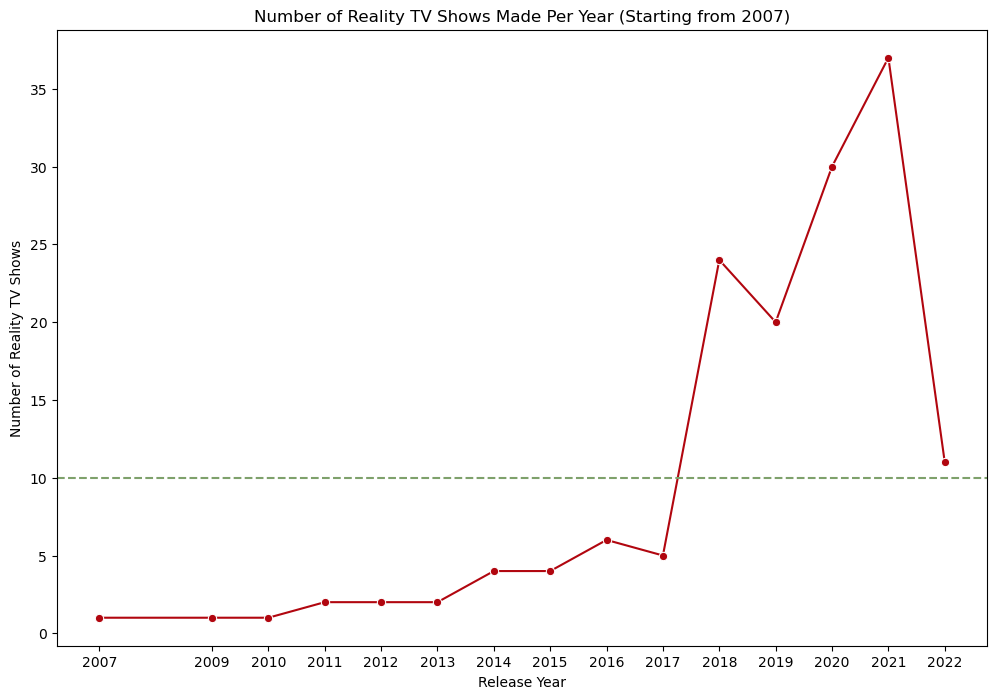

In [6]:
#Plot the line graph
plt.figure(figsize=(12, 8))
sns.lineplot(x='release_year', y='num_shows', data=reality_shows_per_year, marker='o', color='#B1060F')

# Adding labels and title
plt.title('Number of Reality TV Shows Made Per Year (Starting from 2007)')
plt.xlabel('Release Year')
plt.ylabel('Number of Reality TV Shows')
plt.xticks(reality_shows_per_year['release_year'])
plt.grid(False)

# Adding a horizontal line at the average number of shows
plt.axhline(y=average_num_shows, color='#7EA16B', linestyle='--', label=f'Average Shows ({average_num_shows:.2f})')

# Display the plot
plt.savefig("Images/05_S1_Number_of_Reality_TV_Shows_Made_Per_Year.png")
plt.show()

In [7]:
#The line plot with markers shows the number of reality TV shows produced each year, starting from 2010.
#The count of reality shows has generally increased over the years, with a noticeable peak around 2020.
#The increasing trend in the number of reality TV shows suggests a growing audience interest in this genre.

In [8]:
# Perform linear regression for the number of reality shows per year
slope_reality, intercept_reality, r_value_reality, p_value_reality, std_err_reality = linregress(reality_shows_per_year['release_year'], reality_shows_per_year['num_shows'])

# Output the regression results
print("Null hypothesis: The decline in the number of reality TV shows in 2022 is statistically significant")
print(f"Slope (Reality): {slope_reality}, P-value (Reality): {p_value_reality}")

# Check for significance for 2022
if p_value_reality < 0.05:
    print("The decline in the number of reality TV shows in 2022 is statistically significant. Therefore, we accept our null hypothesis.")
else:
    print("The decline in the number of reality TV shows in 2022 is not statistically significant. Therefore, we reject our null hypothesis.")


Null hypothesis: The decline in the number of reality TV shows in 2022 is statistically significant
Slope (Reality): 1.9868896925858952, P-value (Reality): 0.0008262942814319202
The decline in the number of reality TV shows in 2022 is statistically significant. Therefore, we accept our null hypothesis.


In [9]:
#We performed a linear regression analysis on the number of reality TV shows released each year on Netflix from 2007 to 2022. 
#The results indicate a statistically significant decline in the number of reality shows in 2022 (P-value < 0.05).

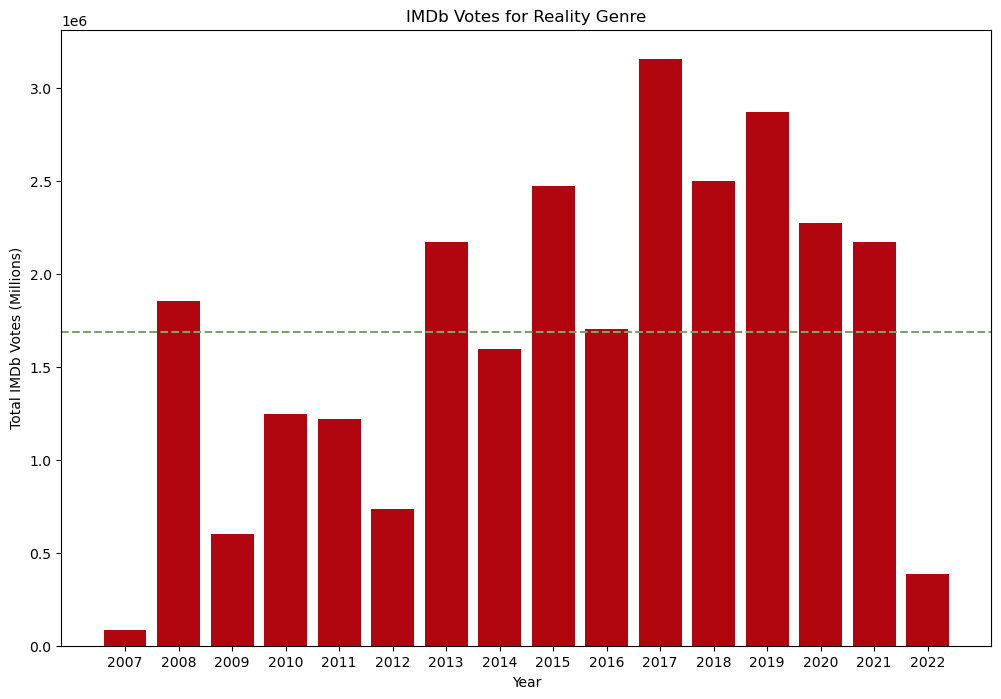

In [10]:
# Filter data for the 'reality' genre
reality_data = netflix_shows[netflix_shows['genres'].str.contains('reality', case=False, na=False)]

# Convert 'release_year' to numeric type
netflix_shows['release_year'] = pd.to_numeric(netflix_shows['release_year'], errors='coerce')

# Filter data for the years 2007 onwards
netflix_shows_after_2007 = netflix_shows[netflix_shows['release_year'] >= 2007]

# Group by 'release_year' and sum the IMDb votes
votes_by_year = netflix_shows_after_2007.groupby('release_year')['imdb_votes'].sum().reset_index()

# Calculate the average IMDb votes
average_imdb_votes = votes_by_year['imdb_votes'].mean()

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(votes_by_year['release_year'], votes_by_year['imdb_votes'], color='#B1060F')

# Adding a horizontal line for the average IMDb votes
plt.axhline(y=average_imdb_votes, color='#7EA16B', linestyle='--', label=f'Average IMDb Votes ({average_imdb_votes:.2f})')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total IMDb Votes (Millions)')
plt.title('IMDb Votes for Reality Genre')

# Show every year on the x-axis
plt.xticks(votes_by_year['release_year'])

# Show the plot
plt.savefig("Images/05_S2_IMDb_Votes_for_Reality_Genre.png")
plt.show()


In [11]:
#This bar chart depicts the total IMDb votes (in millions) garnered by reality genre shows on Netflix from 2007 onwards.
#Each bar corresponds to the cumulative IMDb votes for the 'reality' genre in a specific year. 
#The chart reveals fluctuations and trends in audience engagement over time. Noteworthy peak in 2017 and 2019, however there is a steep decline in 2022 suggesting that engagement in reality tv shows decreased hugely post-pandemic. 


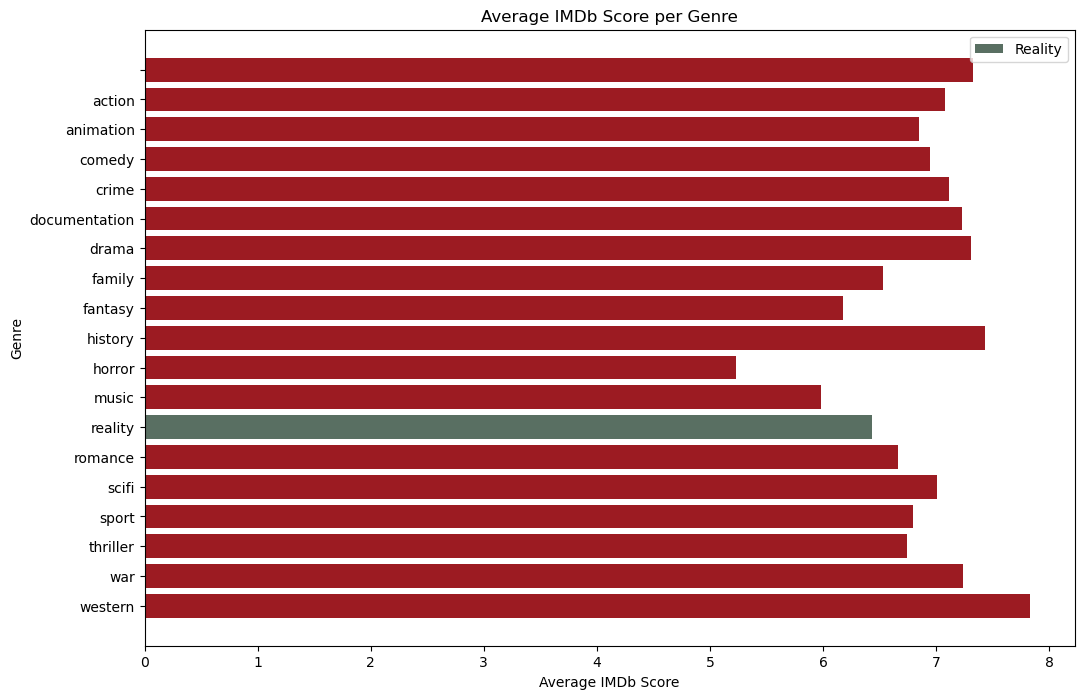

In [12]:
# Extract the first genre from the list of genres
netflix_shows['primary_genre'] = netflix_shows['genres'].apply(lambda x: ast.literal_eval(x)[0] if pd.notna(x) and ast.literal_eval(x) else '')

# Group by genre and calculate the average IMDb score
genre_avg_imdb = netflix_shows.groupby('primary_genre')['imdb_score'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='imdb_score', y='primary_genre', data=genre_avg_imdb, color='#B1060F')

# Set labels and title
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.title('Average IMDb Score per Genre')

reality_index = genre_avg_imdb[genre_avg_imdb['primary_genre'] == 'reality'].index[0]
plt.barh(reality_index, genre_avg_imdb.loc[reality_index, 'imdb_score'], color='#596F62', label='Reality')

# Show the legend
plt.legend()

# Show the plot
plt.savefig("Images/05_S3_Average_IMDb_Score_per_Genre.png")
plt.show()

In [13]:
#The code extracted the primary genre from the list of genres for each TV show.
#Bar chart was created to visualize the average IMDb score for each genre.
#In the bar chart, genres are represented by bars.
#The analysis provides insights into the average IMDb scores for different genres, helping understand audience perceptions.

In [14]:
# Split the DataFrame into reality and other genres
reality_data = netflix_shows[netflix_shows['genres'].str.contains('reality', case=False, na=False)]
other_data = netflix_shows[~netflix_shows['genres'].str.contains('reality', case=False, na=False)]

# Perform a t-test
t_statistic, p_value = ttest_ind(reality_data['imdb_score'].dropna(), other_data['imdb_score'].dropna(), equal_var=False)

print("Null hypothesis: The average IMDb score for the genre of reality tv is not significantly different to the average IMDb score of other genres. ")
# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("There is a significant difference. Therefore we reject our null hypothesis.")
else:
    print("There is no significant difference. Therefore we accept our null hypothesis.")
    


Null hypothesis: The average IMDb score for the genre of reality tv is not significantly different to the average IMDb score of other genres. 
T-statistic: -5.958724175034223
P-value: 1.4171989774899512e-08
There is a significant difference. Therefore we reject our null hypothesis.


In [15]:
#A hypothesis test was conducted to compare the IMDb scores of reality TV shows with those of other genres on Netflix.
#The test results, including the T-statistic and P-value, revealed a significant difference in IMDb scores between reality TV and other genres.
#The analysis suggests that reality TV shows, on average, have significantly different IMDb scores compared to other genres. The significance level (alpha) was set at 0.05.

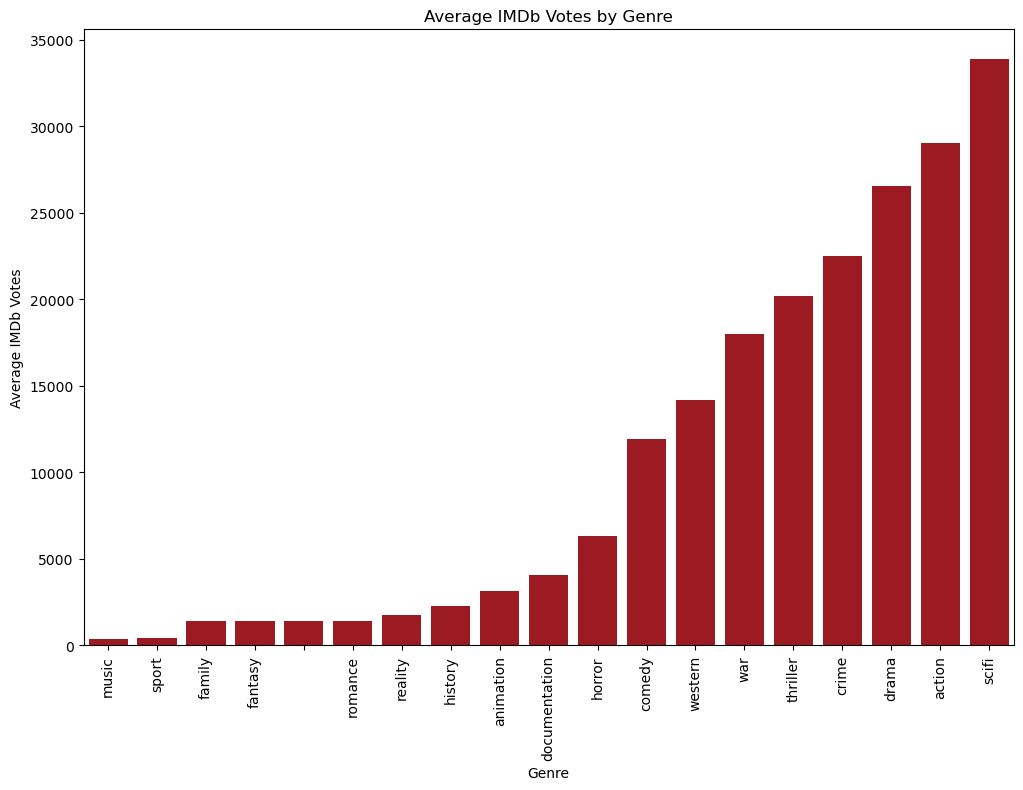

In [16]:
# Extract the first genre from the list of genres
netflix_shows['primary_genre'] = netflix_shows['genres'].apply(
    lambda x: ast.literal_eval(x)[0] if pd.notna(x) and ast.literal_eval(x) else ''
)

# Calculate the average IMDb votes for each genre
genre_avg_votes = netflix_shows.groupby('primary_genre')['imdb_votes'].mean().reset_index()

genre_avg_votes = genre_avg_votes.sort_values(by='imdb_votes')

plt.figure(figsize=(12, 8))

sns.barplot(x='primary_genre', y='imdb_votes', data=genre_avg_votes, color='#B1060F')

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Average IMDb Votes')
plt.title('Average IMDb Votes by Genre')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.savefig("Images/05_4_Average_IMDb_Votes_by_Genre.png")
plt.show()


In [17]:
#A bar chart was generated to display the average IMDb votes for each genre in ascending order.
#Genres were sorted based on the average votes received.
#The visualizations aid decision-makers in understanding trends and making informed choices about content creation and distribution.